# Lectura y visualización de Series de Tiempo (repaso)

En esta lección haremos un repaso de las principales herramientas para la lectura y visualización de Series de Tiempo usando las librerías Pandas, Seaborn y Matplotlib.

Para ver el uso avanzado de varias de estas técnicas se sugiere revisar las siguientes lecciones del curso **"Pandas Nivel Avanzado"** disponible acá en la Academia Online:

- Lección 7: "Series de tiempo en Pandas: índices"
- Lección 15: "Herramientas para la visualización de series de tiempo"

## 1. Lectura de Series de Tiempo

En este caso asumiremos el tipo de archivo más comúnmente usado: CSV (o *comma separated values*).

Para leer una Serie de Tiempo como un *DataFrame* de Pandas es clave que el índice que asignemos a esta tabla sea de tipo "datetime".

Esto facilitará no sólo la visualización sino el posterior pre-procesamiento de la Serie de Tiempo.

Para ver cómo realizar esta lectura comencemos leyendo el set de datos *dow.csv* como un *DataFrame* convencional:

In [1]:
import pandas as pd

# Leer dataset usando el método convencional
RUTA = '/Users/miguel/Library/CloudStorage/GoogleDrive-miguel@codificandobits.com/My Drive/02-CODIFICANDOBITS.COM/04-Academia/01-Cursos/23-2024-05-SeriesDeTiempo-Preprocesamiento/data/'
dow = pd.read_csv(RUTA + 'dow.csv')
dow

,Fecha,Día,Ranking,Diario,Variación,Diferencia,Pronóstico,Cambio Porcentual,Vol,A la fecha,ID
0,26-Apr-21,Viernes,1,"$125,789.89",NaN,-,"$235,036.46",-46.48%,1000,"$125,789.89",1
1,27-Apr-21,Sábado,1,"$99,374.01",79.00%,-26416,"$197,622.55",-49.72%,1000,"$225,163.90",2
2,28-Apr-21,Domingo,1,"$82,203.16",82.72%,-17171,"$116,991.26",-29.74%,1000,"$307,367.06",3
3,29-Apr-21,Lunes,1,"$33,530.26",40.79%,-48673,"$66,652.65",-49.69%,1000,"$340,897.32",4
4,30-Apr-21,Martes,1,"$30,105.24",89.79%,-3425,"$34,828.19",-13.56%,1000,"$371,002.56",5
...,...,...,...,...,...,...,...,...,...,...,...
123,27-Aug-21,Martes,42,$0.00,29.03%,0,$0.01,-45.07%,100,"$752,143.86",124
124,28-Aug-21,Miércoles,43,$0.00,49.60%,0,$0.00,-32.94%,100,"$752,143.87",125
125,29-Aug-21,Viernes,42,$0.00,29.03%,0,$0.00,-38.06%,100,"$752,143.87",126
126,30-Aug-21,Viernes,36,$0.00,49.60%,0,$0.00,-24.58%,100,"$752,143.87",127


En este caso lo que quisiéramos hacer sería fijar la columna "Fecha" como índice del *DataFrame* pero que a la vez dicha columna esté en el formato *datetime*.

Por defecto, al hacer la lectura usando el método anterior, la columna "Fecha" tendrá formato tipo *string*:

In [2]:
dow['Fecha']

0      26-Apr-21
1      27-Apr-21
2      28-Apr-21
3      29-Apr-21
4      30-Apr-21
         ...    
123    27-Aug-21
124    28-Aug-21
125    29-Aug-21
126    30-Aug-21
127    31-Aug-21
Name: Fecha, Length: 128, dtype: object

Para leer correctamente la Serie de Tiempo como un *DataFrame* podemos usar estos dos parámetros:

- `parse_dates = ['Fecha']`: para que los elementos de la columna "Fecha" sean leídos en el formato *datetime*
- `index_col = 'Fecha'`: para fijar la columna "Fecha" como índice del *DataFrame*

Veamos esta implementación:

In [3]:
# Creación de la serie de tiempo al momento de la lectura
dow = pd.read_csv(RUTA + 'dow.csv', 
                      parse_dates=['Fecha'],
                      index_col='Fecha')
dow

,Día,Ranking,Diario,Variación,Diferencia,Pronóstico,Cambio Porcentual,Vol,A la fecha,ID
Fecha,,,,,,,,,,
2021-04-26,Viernes,1,"$125,789.89",NaN,-,"$235,036.46",-46.48%,1000,"$125,789.89",1
2021-04-27,Sábado,1,"$99,374.01",79.00%,-26416,"$197,622.55",-49.72%,1000,"$225,163.90",2
2021-04-28,Domingo,1,"$82,203.16",82.72%,-17171,"$116,991.26",-29.74%,1000,"$307,367.06",3
2021-04-29,Lunes,1,"$33,530.26",40.79%,-48673,"$66,652.65",-49.69%,1000,"$340,897.32",4
2021-04-30,Martes,1,"$30,105.24",89.79%,-3425,"$34,828.19",-13.56%,1000,"$371,002.56",5
...,...,...,...,...,...,...,...,...,...,...
2021-08-27,Martes,42,$0.00,29.03%,0,$0.01,-45.07%,100,"$752,143.86",124
2021-08-28,Miércoles,43,$0.00,49.60%,0,$0.00,-32.94%,100,"$752,143.87",125
2021-08-29,Viernes,42,$0.00,29.03%,0,$0.00,-38.06%,100,"$752,143.87",126


Y verifiquemos que el índice es de tipo *datetime*:

In [4]:
dow.index

DatetimeIndex(['2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03',
               '2021-05-04', '2021-05-05',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='Fecha', length=128, freq=None)

¡Perfecto! En este punto ya tenemos un *DataFrame* con varias columnas que representan diferentes series de tiempo.

Por ejemplo, podemos leer únicamente las columnas `Diario`, `Pronóstico` y `Cambio Porcentual` como nuestras Series de Tiempo de interés. Para ello usamos el parámetro `usecols`:

In [5]:
# Leer columnas (series de tiempo) específicas
dow = pd.read_csv(RUTA + 'dow.csv', 
                      parse_dates=['Fecha'],
                      index_col='Fecha',
                      usecols=['Fecha', 'Diario', 'Pronóstico', 'Cambio Porcentual'])
dow

,Diario,Pronóstico,Cambio Porcentual
Fecha,,,
2021-04-26,"$125,789.89","$235,036.46",-46.48%
2021-04-27,"$99,374.01","$197,622.55",-49.72%
2021-04-28,"$82,203.16","$116,991.26",-29.74%
2021-04-29,"$33,530.26","$66,652.65",-49.69%
2021-04-30,"$30,105.24","$34,828.19",-13.56%
...,...,...,...
2021-08-27,$0.00,$0.01,-45.07%
2021-08-28,$0.00,$0.00,-32.94%
2021-08-29,$0.00,$0.00,-38.06%


También, como parte de la lectura, debemos garantizar que las columnas de interés contengan datos numéricos. En este caso las tres columnas leídas no cumplen con este requisito:

In [6]:
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Diario             128 non-null    object
 1   Pronóstico         128 non-null    object
 2   Cambio Porcentual  128 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


Así que debemos realizar algo de limpieza sobre estas columnas para obtener de cada una una representación numérica.

Por ejemplo, podemos eliminar el símbolo "$" y convertir a formato *float* las columnas `Diario` y `Pronóstico`. Para ello podemos usar funciones lambda y la función `apply()` (ver lección 9 del curso "Pandas Nivel Básico"):<

In [7]:
limpiar = lambda x: x.str.replace('[^\d]', '', regex=True)  # [^\d]: buscar caracteres no numéricos
dow_c = dow[['Diario', 'Pronóstico']].apply(limpiar, axis=1)# Aplicar función anterior
dow[['Diario', 'Pronóstico']] = dow_c.astype(float)         # Reemplazar columnas originales por columnas procesadas
dow

,Diario,Pronóstico,Cambio Porcentual
Fecha,,,
2021-04-26,12578989.0,23503646.0,-46.48%
2021-04-27,9937401.0,19762255.0,-49.72%
2021-04-28,8220316.0,11699126.0,-29.74%
2021-04-29,3353026.0,6665265.0,-49.69%
2021-04-30,3010524.0,3482819.0,-13.56%
...,...,...,...
2021-08-27,0.0,1.0,-45.07%
2021-08-28,0.0,0.0,-32.94%
2021-08-29,0.0,0.0,-38.06%


In [8]:
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diario             128 non-null    float64
 1   Pronóstico         128 non-null    float64
 2   Cambio Porcentual  128 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


Y también podemos hacer algo similar pero para eliminar el símbolo "%" en el caso de la columna "Cambio Porcentual":

In [9]:
# Remover porcentaje 
dow['Cambio Porcentual'] = dow['Cambio Porcentual'].apply(lambda x: x.replace('%', '')).astype(float)
dow

,Diario,Pronóstico,Cambio Porcentual
Fecha,,,
2021-04-26,12578989.0,23503646.0,-46.48
2021-04-27,9937401.0,19762255.0,-49.72
2021-04-28,8220316.0,11699126.0,-29.74
2021-04-29,3353026.0,6665265.0,-49.69
2021-04-30,3010524.0,3482819.0,-13.56
...,...,...,...
2021-08-27,0.0,1.0,-45.07
2021-08-28,0.0,0.0,-32.94
2021-08-29,0.0,0.0,-38.06


Y con esto ya tenemos listas nuestras Series de Tiempo:

In [10]:
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diario             128 non-null    float64
 1   Pronóstico         128 non-null    float64
 2   Cambio Porcentual  128 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


## 2. Visualización con Series de Tiempo

Las dos maneras más sencillas de realizar esta visualización son: usando la librería Seaborn (método recomendado) o el método `plot()` de la librería Pandas.

Veamos cómo visualizar las Series de Tiempo que acabamos de leer usando Seaborn:

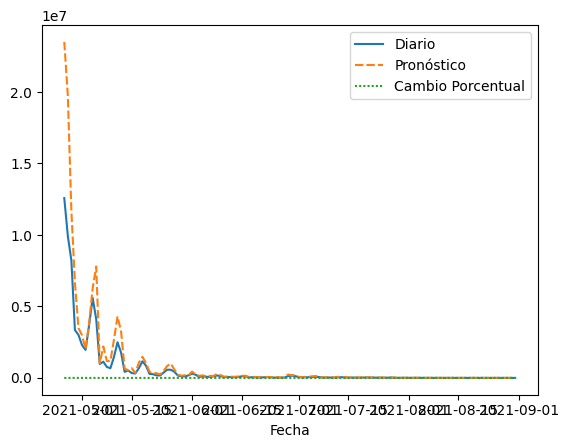

In [11]:
# Importar Seaborn y Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Generar gráfico de todas las Series de Tiempo usando "lineplot"
ax = sns.lineplot(dow)

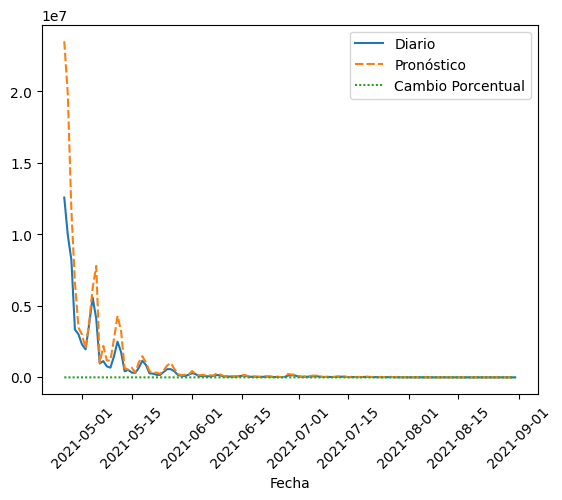

In [12]:
# Y rotar las etiquetas 45°
ax = sns.lineplot(dow)
plt.xticks(rotation=45);

Si queremos dibujar sólo una de las Series simplemente seleccionamos la columnas de interés:

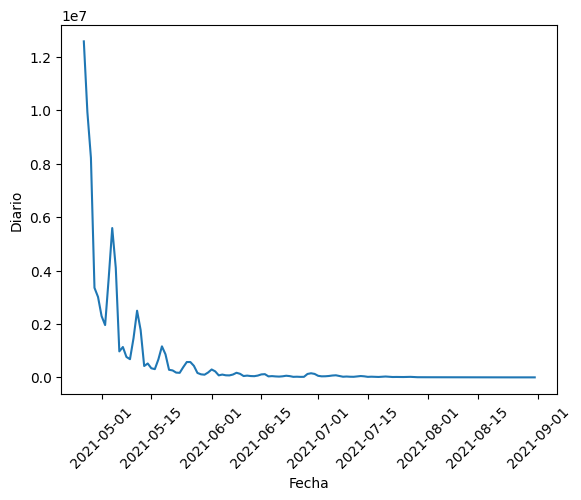

In [13]:
# Dibujar sólo una de las series
ax = sns.lineplot(dow['Diario'])
plt.xticks(rotation=45);

Y podemos usar herramientas adicionales de Matplotlib para modificar por ejemplo las etiquetas del eje horizontal (variable tiempo).

Por ejemplo, hagamos uso de `mdates` de Matplotlib para mostrar sólo el mes y el día en las marcas de tiempo:

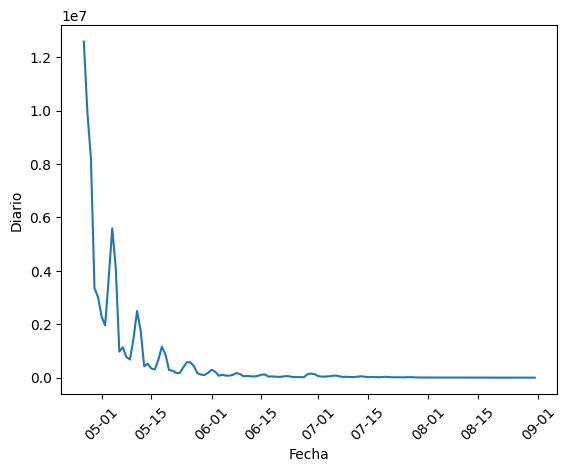

In [14]:
# Mostrar sólo mes-día (no año)
import matplotlib.dates as mdates

# Generemos el gráfico anterior
ax = sns.lineplot(data=dow['Diario'])

# Y ahora usemos "DateFormatter" para especificar el formato con el que queremos mostrar
# las marcas de tiempo
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Y finalmente rotemos las etiquetas
plt.xticks(rotation=45);

También podemos modificar la sintaxis de `DateFormatter` para mostrar las iniciales del mes en lugar del número:

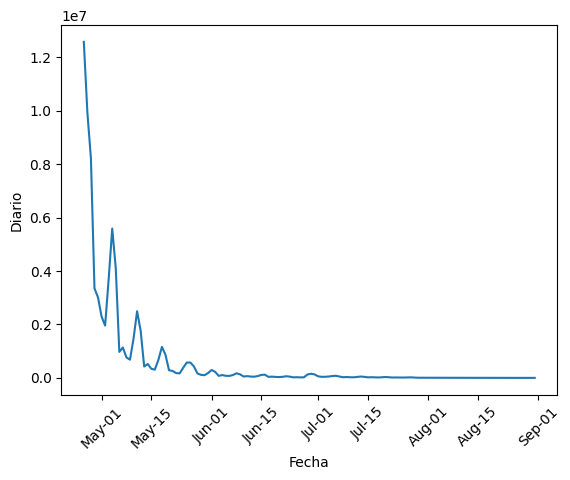

In [15]:
# En lugar del númnero del mes mostrar sus iniciales
ax = sns.lineplot(data=dow['Diario'])

# Y ahora usemos "DateFormatter" para especificar el formato con el que queremos mostrar
# las marcas de tiempo
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# Y finalmente rotemos las etiquetas
plt.xticks(rotation=45);

Y otra alternativa a los métodos anteriores es usando el método `plot()` de la librería Pandas:

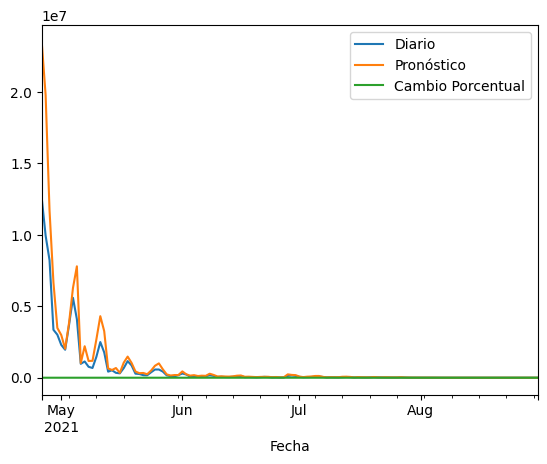

In [16]:
# Usando Herramientas propias de pandas
dow.plot();

Y de forma similar al caso anterior, podemos seleccionar sólo una columna (Serie de Tiempo) a dibujar y usar `mdates` para modificar las marcas de tiempo:

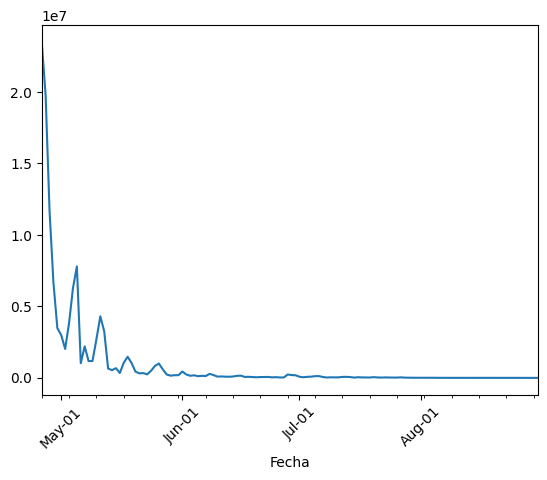

In [17]:
# Mostrar Serie de Tiempo "Pronóstico"
ax = dow['Pronóstico'].plot();

# Mostrar cada marca de tiempo como las iniciales del mes y el día
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# Usemos "DayLocator" y el parámetro "interval" para especificar que las marcas de tiempo
# se mostrarán con periodicidad de 1 mes
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Y finalmente rotemos las etiquetas
plt.xticks(rotation=45);